This is how much space the figure will take up on letter paper


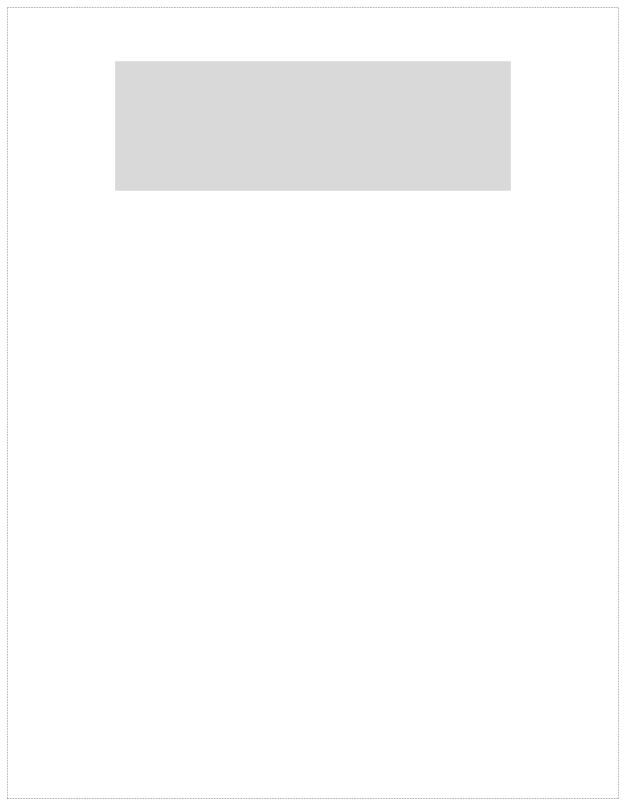

In [69]:
__PRODUCTION__ = 1
__NAME__       = 'efficiency-kernel'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.8

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure,  size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [34]:
import functools
import numpy as np
import colorsys
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import json
import pickle
import matplotlib

from symfac.experimental import RBFExpansionV2

In [3]:
d_tensor = torch.load('data/paper/d1')
target = torch.tensor(d_tensor, dtype=torch.float)

<ipython-input-3-0a4f1db08579>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(d_tensor, dtype=torch.float)


In [4]:
gd_10_losses, gd_10_times  = pickle.loads(open('gd_10.pickle', 'rb').read())
sgd_long_losses, sgd_long_times  = pickle.loads(open('sgd_long.pickle', 'rb').read())
sgd_10_losses, sgd_10_times  = pickle.loads(open('sgd_10.pickle', 'rb').read())
sgd_full  = pickle.loads(open('sgd_full.pickle', 'rb').read())


In [13]:
sgd_full_13  = pickle.loads(open('sgd_full_13.pickle', 'rb').read())

sgd_full_14  = pickle.loads(open('sgd_full_14.pickle', 'rb').read())

sgd_full_15  = pickle.loads(open('sgd_full_15.pickle', 'rb').read())



In [16]:
sgd_full_16  = pickle.loads(open('sgd_full_16.pickle', 'rb').read())

In [17]:
sgd_full_16

[0.0061504,
 0.0041449,
 0.0023808,
 0.0012769,
 0.0005753,
 0.0002058,
 7.15e-05,
 4.47e-05]

In [26]:
sgd_average = [1/5*(sgd_full[t] + sgd_full_13[t] + sgd_full_14[t] + sgd_full_15[t]+ sgd_full_16[t]) for t in range(len(sgd_full))]

In [11]:
#gk_losses = pickle.loads(open('data/paper/gk_losses_2.pickle', 'rb').read())
#gkl_losses = pickle.loads(open('data/paper/gk_long_losses.pickle', 'rb').read())


In [19]:
def find_svd(X,s):
    U, S, V = np.linalg.svd(X.detach().numpy())
    return round(float(F.mse_loss(torch.tensor((U[:, :s] * S[None, :s]) @ V[:s, :]), X)), 7)

In [20]:
s_vals = []
for s in range(1, target.shape[0]):
    s_vals.append(find_svd(target, s))

In [21]:
svd_10_losses = s_vals[:10]

In [22]:
checkpoints = [1,2,4,8,16,32,64,128]
checkpoints = [t - 1 for t in checkpoints]
checkpoints

[0, 1, 3, 7, 15, 31, 63, 127]

In [23]:
checkpoints

[0, 1, 3, 7, 15, 31, 63, 127]

In [24]:
svd_full = [s_vals[t] for t in checkpoints]

BrokenPipeError: [Errno 32] Broken pipe

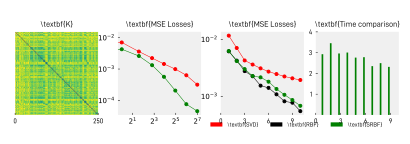

In [70]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.02
dx = 0.26
dx2 = 0.02
w = 0.21
axs = [
    fig.make_axes(
        left=x0 + dx * i - dx2*(i//3),
        width=w,
        top=0.19,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]


def draw_bars(ax, h, offset, **kwargs):
    ax.bar(np.arange(len(h)) + offset, h, **kwargs)

bar_width = 0.4
bar_style = dict(
    width = 0.5*bar_width
)
svd_style = dict(
    color='r',
    label=r'\textbf{SVD}'
)
rbf_style = dict(
    color='k',
    label=r'\textbf{RBF}'
)
srbf_style = dict(
    color='g',
    label=r'\textbf{SRBF}'
)

axs[0].imshow(target)

axs[1].loglog(checkpoints, sgd_average, 'g.-', checkpoints, svd_full, 'r.-')    
#axs[1].set_yscale('log')    


axs[2].plot(range(1, 11), svd_10_losses, 'r.-', range(1, 11), gd_10_losses, 'k.-', range(1, 11), sgd_10_losses, 'g.-')
axs[2].set_yscale('log')  

draw_bars(axs[3], [gd_10_times[t]/sgd_10_times[t] for t in range(10)], -0.5 * bar_width, **bar_style, **srbf_style)
#draw_bars(axs[3], data['times']['rbf'], 0.5 * bar_width, **bar_style, **rbf_style)



title_style = dict(
    fontsize=8,
    y=0.975,
    va='bottom'
)

tick_style = dict(
    fontsize=7,
)
label_style = dict(
    fontsize=8,
    labelpad=0.75,
)

ticks = [0,250]
axs[0].set_xbound(lower=0, upper=250)
axs[0].set_ybound(lower=0, upper=250)
axs[0].set_xticks(ticks)
axs[0].set_yticks([])
axs[0].set_xticklabels(['%d' % x for x in [0, 250]], **tick_style)
axs[0].set_yticklabels(['%d' % y for y in [0, 250]], **tick_style)

for i in [1]:
    yticks = np.linspace(-4, -2, 3) 
    xticks = np.linspace(1, 7, 4)
    axs[i].set_xticks(2**xticks)
    axs[i].set_yticks(10**yticks)
    axs[i].set_xticklabels([fr'$2^{{{t:.0f}}}$' for t in xticks], **tick_style)
    axs[i].set_yticklabels([fr'$10^{{{t:.0f}}}$' for t in yticks], **tick_style)
    
for i in [2]:
    yticks = np.linspace(-3, -2, 2) 
    xticks = [0,3,6,9] 
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(10**yticks)
    axs[i].set_xticklabels(['%d' % x for x in xticks], **tick_style)
    axs[i].set_yticklabels([fr'$10^{{{t:.0f}}}$' for t in yticks], **tick_style)


xticks = [0,3,6, 9]
yticks = [1,2,3,4]
axs[3].set_xbound(lower=0, upper=10)

axs[3].set_xticks(xticks)
axs[3].set_yticks(yticks)
axs[3].set_xticklabels(['%d' % x for x in xticks], **tick_style)
axs[3].set_yticklabels(['%d' % y for y in yticks], **tick_style)

axs[0].set_title(r'\textbf{K}', **title_style)
axs[1].set_title(r'\textbf{MSE Losses}', **title_style)
axs[2].set_title(r'\textbf{MSE Losses}', **title_style)
axs[3].set_title(r'\textbf{Time comparison}', **title_style)

ax_canvas.bar([-1], [0], **bar_style, **svd_style)
ax_canvas.bar([-1], [0], **bar_style, **rbf_style)
ax_canvas.bar([-1], [0], **bar_style, **srbf_style)
ax_canvas.legend(
    loc='lower left',
    bbox_to_anchor=(0.5, 0.03),
    ncol=3,
    frameon=False,
    fontsize=6
)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

In [ ]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

END
---